# Still Standing - pre-processing


Setting some variables that will be helpful later.

In [15]:
stillstanding_no = '052'

In [2]:
date = '2023-02-22'

Importing libraries needed to run the rest of the notebook

In [3]:
import os
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.signal import savgol_filter
%matplotlib inline

import os
import musicalgestures as mg
import maad
import librosa
import librosa.display

/home/alexander/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/alexander/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  meth

In [4]:
!ls ../1-raw/

2023-02-21-005.WAV	       2023-02-21-GS010133.LRV	2023-02-21-GS020133.THM
2023-02-21_19-01-25_polar.CSV  2023-02-21-GS010133.THM	2023-02-21T19.01.12.csv
2023-02-21_19-01-25_polar.TCX  2023-02-21-GS020133.360	discarded-ustaoset
2023-02-21-GS010133.360        2023-02-21-GS020133.LRV


In [77]:
fn_audio     = '../1-raw/2023-02-21-005.WAV'
fn_polar     = '../1-raw/2023-02-21_19-01-25_polar.CSV'
fn_IMU       = '../1-raw/2023-02-21T19.01.12.csv'

## Audio

In [7]:
y, sr = librosa.load(fn_audio)

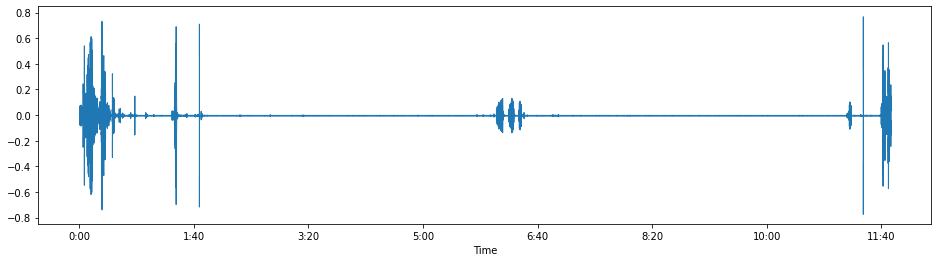

In [9]:
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,4))

librosa.display.waveshow(y, sr=sr)

#ax.set(title='Audio waveform')
#ax.legend()

#fig.savefig("audio_waveform.pdf", bbox_inches='tight',facecolor='white', dpi=150)

In [40]:
audio_out_fn = date + '_' + stillstanding_no + '_ambisonics.wav'

In [41]:
audio_clap_start = '00:01:43'
audio_clap_end   = '00:11:25'

In [42]:
!ffmpeg -i $fn_audio -ss $audio_clap_start -to $audio_clap_end -c copy $audio_out_fn

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

## Video

### Spherical video

In [38]:
video_spherical_out_fn = date + '_' + stillstanding_no + '_spherical.mp4'

In [31]:
# Create list of files
!printf "file '%s'\n" ../1-raw/*.LRV > mylist.txt

# Concatenate files
!ffmpeg -f concat -safe 0 -i mylist.txt -c copy $video_spherical_out_fn

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [37]:
video_spherical_out_fn_trim = date + '_' + stillstanding_no + '_spherical_trim.mp4'

In [35]:
video_clap_start = '00:01:59'
video_clap_end   = '00:11:40'

In [36]:
!ffmpeg -i $video_spherical_out_fn -ss $video_clap_start -to $video_clap_end -c copy $video_spherical_out_fn_trim

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

### 360 video - ARJ

In [43]:
# Create list of files
!printf "file '%s'\n" ../1-raw/*.360 > mylist.txt

# Concatenate files
!ffmpeg -f concat -safe 0 -i mylist.txt -map 0:0 -c copy track0.mp4 -map 0:5 -c copy track5.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Then we trim and crop the video. Let us first inspect the video with FFplay to find the right crop area. 

In [51]:
!ffplay -i track5.mp4 -ss $video_clap_start -vf crop=1700:850:1000:250,transpose=2

ffplay version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2003-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [52]:
video_arj_out_fn_trim = date + '_' + stillstanding_no + '_arj_trim_crop.mp4'

Then we perform the trimming and cropping:

In [54]:
!ffmpeg -i track5.mp4 -ss $video_clap_start -to $video_clap_end -vf crop=1700:850:1000:250,transpose=2 $video_arj_out_fn_trim

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

### 360 video - Room

In [69]:
!ffplay -i track0.mp4 -ss $video_clap_start -vf crop=2700:1300:700:0

ffplay version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2003-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [71]:
video_room_out_fn_trim = date + '_' + stillstanding_no + '_room_trim_crop.mp4'

In [72]:
!ffmpeg -i track0.mp4 -ss $video_clap_start -to $video_clap_end -vf crop=2700:1300:700:0 $video_room_out_fn_trim

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

## Reading data from Polar Vantage V sports watch

In [78]:
data_polar = pd.read_csv(fn_polar, delimiter=',',index_col=0, low_memory=False, skiprows=2, usecols=[1,2,9])

In [79]:
data_polar

,HR (bpm),Temperatures (C)
Time,,
00:00:00,91,26.5
00:00:01,91,26.5
00:00:02,91,26.5
00:00:03,91,26.6
00:00:04,91,26.6
...,...,...
00:09:30,98,26.5
00:09:31,98,26.5
00:09:32,99,26.5


Let us check the data types of the variables.

In [80]:
data_polar.dtypes

HR (bpm)              int64
Temperatures (C)    float64
dtype: object

And the data type of the index.

In [81]:
data_polar.index

Index(['00:00:00', '00:00:01', '00:00:02', '00:00:03', '00:00:04', '00:00:05',
       '00:00:06', '00:00:07', '00:00:08', '00:00:09',
       ...
       '00:09:25', '00:09:26', '00:09:27', '00:09:28', '00:09:29', '00:09:30',
       '00:09:31', '00:09:32', '00:09:33', '00:09:34'],
      dtype='object', name='Time', length=575)

This does not work, so we need to convert to a proper timecode:

In [82]:
data_polar.index = pd.TimedeltaIndex(data_polar.index)

Then we export to a standard CSV file:

In [84]:
polar_out_fn = date + '_' + stillstanding_no + '_polar.csv'

In [86]:
data_polar.to_csv(polar_out_fn)

## Read and check Data

Reading CSV files from [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/dev?id=6483394247866966083&hl=en) by [Vieyra Software](https://www.vieyrasoftware.net/).

In [91]:
data = pd.read_csv(fn_IMU, delimiter=';',decimal=',',index_col=0, low_memory=False)

### Check files

Before moving on we should briefly check what we have imported.

In [92]:
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s),Unnamed: 22
time,,,,,,,,,,,,,,,,,,,,,
0.040576,"−0,1132","0,5173","0,8147","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",0.0000,...,"0,0000",0.0,0.0000,"0,0000","0,0000",−∞,0.000000,0.000000,0.0,NaN
0.046639,"−0,0964","0,5077","0,8797","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",0.0000,...,"0,0000",0.0,0.0000,"0,0000","0,0000",−∞,60.506501,7.905720,0.0,NaN
0.084480,"−0,0964","0,5077","0,8797","0,0000","0,0000","0,0000","−0,0999","−0,1179","0,0457",0.0000,...,"0,0000",0.0,0.0000,"0,0000","0,0000",−∞,60.506501,7.905720,0.0,NaN
0.088139,"−0,0964","0,5077","0,8797","0,0000","0,0000","0,0000","−0,0999","−0,1179","0,0457",0.0000,...,"20,5500",0.0,0.0000,"0,0000","0,0000",−∞,60.506501,7.905720,0.0,NaN
0.103358,"−0,0798","0,4992","0,8858","0,0000","0,0000","0,0000","−0,0999","−0,1179","0,0457",0.0000,...,"20,5500",0.0,0.0000,"0,0000","0,0000",−∞,60.506501,7.905720,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599.671821,"−0,7127","0,1096","0,7467","0,3326","0,0375","0,2320","0,1180","0,1449","0,0396",884.9829,...,"−45,5063",160.0,96.5559,"−5,5337","−45,9440","63,7649",60.506503,7.905718,0.0,NaN
599.672620,"−0,7127","0,1096","0,7467","0,3326","0,0375","0,2320","0,1180","0,1449","0,0396",884.9790,...,"−45,5063",160.0,96.5559,"−5,5337","−45,9440","63,7649",60.506503,7.905718,0.0,NaN
599.677692,"−0,7127","0,1096","0,7467","0,3326","0,0375","0,2320","0,1180","0,1449","0,0396",884.9790,...,"−45,5063",159.0,96.5559,"−5,5337","−45,9440","63,7649",60.506503,7.905718,0.0,NaN


This is a description of the variables:

| Name           | Description   | Unit |
|:----           |:-----------   |:---- |
| gFx            | g-force X     | FN/Fg |
| gFy            | g-force Y     | FN/Fg |
| gFz            | g-force Z     | FN/Fg |
| ax             | linear acceleration X | m/s2 |
| ay             | linear acceleration Y | m/s2 |
| az             | linear acceleration Z | m/s2 |
| wx             | gyroscope X   | rad/s |
| wy             | gyroscope Y   | rad/s |
| wz             | gyroscope Z   | rad/s |
| p              | barometer     | Pa |
| Bx             | magnetometer X | μT |
| By             | magnetometer Y | μT |
| Bz             | magnetometer Z | μT |
| I              | light meter   | lx |
| Azimuth        | inclinometer  | |
| Pitch          | inclinometer  | |
| Roll           | inclinometer  | |
| Gain           | sound meter   | dB |
| Latitude       | GPS Latitude  | degrees |
| Longitude      | GPS Longitude | degrees |
| Speed | m/s)   | GPS Speed     | km/h |

There is one column too much, due to a semicolon at the end of the file. Therefore, we remove the extra column like this:

In [93]:
data = data.drop(data.columns[21],axis=1)
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,...,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s)
time,,,,,,,,,,,,,,,,,,,,,
0.040576,"−0,1132","0,5173","0,8147","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",0.0000,...,"0,0000","0,0000",0.0,0.0000,"0,0000","0,0000",−∞,0.000000,0.000000,0.0
0.046639,"−0,0964","0,5077","0,8797","0,0000","0,0000","0,0000","0,0000","0,0000","0,0000",0.0000,...,"0,0000","0,0000",0.0,0.0000,"0,0000","0,0000",−∞,60.506501,7.905720,0.0
0.084480,"−0,0964","0,5077","0,8797","0,0000","0,0000","0,0000","−0,0999","−0,1179","0,0457",0.0000,...,"0,0000","0,0000",0.0,0.0000,"0,0000","0,0000",−∞,60.506501,7.905720,0.0
0.088139,"−0,0964","0,5077","0,8797","0,0000","0,0000","0,0000","−0,0999","−0,1179","0,0457",0.0000,...,"−116,0250","20,5500",0.0,0.0000,"0,0000","0,0000",−∞,60.506501,7.905720,0.0
0.103358,"−0,0798","0,4992","0,8858","0,0000","0,0000","0,0000","−0,0999","−0,1179","0,0457",0.0000,...,"−116,0250","20,5500",0.0,0.0000,"0,0000","0,0000",−∞,60.506501,7.905720,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599.671821,"−0,7127","0,1096","0,7467","0,3326","0,0375","0,2320","0,1180","0,1449","0,0396",884.9829,...,"−4,8188","−45,5063",160.0,96.5559,"−5,5337","−45,9440","63,7649",60.506503,7.905718,0.0
599.672620,"−0,7127","0,1096","0,7467","0,3326","0,0375","0,2320","0,1180","0,1449","0,0396",884.9790,...,"−4,8188","−45,5063",160.0,96.5559,"−5,5337","−45,9440","63,7649",60.506503,7.905718,0.0
599.677692,"−0,7127","0,1096","0,7467","0,3326","0,0375","0,2320","0,1180","0,1449","0,0396",884.9790,...,"−4,8188","−45,5063",159.0,96.5559,"−5,5337","−45,9440","63,7649",60.506503,7.905718,0.0


The speed column is quite useless, so getting rid of that one too.

In [95]:
data = data.drop(data.columns[20],axis=1)
data

IndexError: index 20 is out of bounds for axis 0 with size 20

Let us just check what data types we have read in: 

In [96]:
data.dtypes

gFx           object
gFy           object
gFz           object
ax            object
ay            object
az            object
wx            object
wy            object
wz            object
p            float64
Bx            object
By            object
Bz            object
I            float64
Azimuth      float64
Pitch         object
Roll          object
Gain          object
Latitude     float64
Longitude    float64
dtype: object

There is obviously something wrong, since only one column has loaded with float values. By visual inspection we see that the minus signs are coded with a − (n-dash) instead of hyphen. This makes the importer fail, so that the decimal marker has not properly been changed from comma (,) to dot (.). So we need to change this. 

In [97]:
# Replacing n-dash with hyphen
data=data.replace(to_replace='−', value='-',regex=True)
# Replacing comma with dot
data=data.replace(to_replace=',', value='.',regex=True)
# Replacing NAN with zeros
data=data.replace(to_replace='∞', value='0',regex=True)
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,Bx,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude
time,,,,,,,,,,,,,,,,,,,,
0.040576,-0.1132,0.5173,0.8147,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,-0,0.000000,0.000000
0.046639,-0.0964,0.5077,0.8797,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,-0,60.506501,7.905720
0.084480,-0.0964,0.5077,0.8797,0.0000,0.0000,0.0000,-0.0999,-0.1179,0.0457,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,-0,60.506501,7.905720
0.088139,-0.0964,0.5077,0.8797,0.0000,0.0000,0.0000,-0.0999,-0.1179,0.0457,0.0000,-40.7250,-116.0250,20.5500,0.0,0.0000,0.0000,0.0000,-0,60.506501,7.905720
0.103358,-0.0798,0.4992,0.8858,0.0000,0.0000,0.0000,-0.0999,-0.1179,0.0457,0.0000,-40.7250,-116.0250,20.5500,0.0,0.0000,0.0000,0.0000,-0,60.506501,7.905720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599.671821,-0.7127,0.1096,0.7467,0.3326,0.0375,0.2320,0.1180,0.1449,0.0396,884.9829,11.6250,-4.8188,-45.5063,160.0,96.5559,-5.5337,-45.9440,63.7649,60.506503,7.905718
599.672620,-0.7127,0.1096,0.7467,0.3326,0.0375,0.2320,0.1180,0.1449,0.0396,884.9790,11.6250,-4.8188,-45.5063,160.0,96.5559,-5.5337,-45.9440,63.7649,60.506503,7.905718
599.677692,-0.7127,0.1096,0.7467,0.3326,0.0375,0.2320,0.1180,0.1449,0.0396,884.9790,11.6250,-4.8188,-45.5063,159.0,96.5559,-5.5337,-45.9440,63.7649,60.506503,7.905718


In [98]:
# Now that the data should have been formatted correctly, we can change to float64
data=data.astype(float)
data.dtypes

gFx          float64
gFy          float64
gFz          float64
ax           float64
ay           float64
az           float64
wx           float64
wy           float64
wz           float64
p            float64
Bx           float64
By           float64
Bz           float64
I            float64
Azimuth      float64
Pitch        float64
Roll         float64
Gain         float64
Latitude     float64
Longitude    float64
dtype: object

Then we should be ready to go. Let us just check the sampling rate first.

In [99]:
# The sampling rate is the total number of samples divided by time
sr = len(data)/data.index[-1]
sr

141.7006138092055

That is a quite high sampling rate, and probably higher than necessary. Let us therefore see if we can remove redundant rows (where there is no change of data). Since the acceleration data is most interesting for the future analysis, we use those columns for removing duplicates.

In [100]:
#data = data.drop_duplicates(subset=['gFx','gFy','gFz'], keep='first')
data = data.drop_duplicates(subset=['ax','ay','az'], keep='first')
data

,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,p,Bx,By,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude
time,,,,,,,,,,,,,,,,,,,,
0.040576,-0.1132,0.5173,0.8147,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,-0.0000,0.000000,0.000000
0.228278,-0.0803,0.4996,0.8846,-0.0390,0.0035,-0.0235,-0.0577,-0.1370,0.0182,885.0076,-41.5500,-116.1188,19.5000,61.0,355.5711,-29.7428,-5.2584,-0.0000,60.506501,7.905720
0.293854,-0.0719,0.4882,0.8956,0.0006,-0.1001,0.1552,0.0061,-0.1232,-0.0046,885.0134,-41.6250,-116.1938,19.7250,61.0,356.1401,-29.6511,-4.9878,-0.0000,60.506501,7.905720
0.360571,-0.0603,0.4927,0.8824,-0.1568,-0.0391,-0.0474,0.0634,-0.0473,0.0379,885.0122,-41.9438,-116.2875,19.8563,65.0,356.0072,-29.2017,-4.4599,-0.0000,60.506501,7.905720
0.428496,-0.0571,0.4809,0.9004,0.0481,-0.1222,0.1483,0.1633,0.0043,0.0435,885.0110,-42.1688,-116.3063,20.1562,65.0,356.6471,-29.5144,-4.6233,-0.0000,60.506501,7.905720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599.380901,-0.6845,0.0907,0.7199,0.3689,0.0824,0.3503,0.0522,-0.0864,0.0107,884.9119,16.5188,-3.6188,-44.4938,160.0,96.0709,-4.7176,-47.7872,51.0194,60.506503,7.905718
599.448543,-0.6978,0.0913,0.7183,0.3684,0.0238,0.4104,0.0718,-0.0283,-0.0276,884.9365,14.8313,-3.9563,-45.1125,160.0,96.2958,-4.9730,-47.3317,51.0194,60.506503,7.905718
599.514399,-0.6912,0.0949,0.7303,0.2364,0.0279,0.3134,0.0347,-0.0040,0.0026,884.9583,13.2938,-4.3125,-45.4125,160.0,96.4626,-5.0316,-46.7802,51.0194,60.506503,7.905718


That helped in removing quite a lot of data. Let us check the new sampling rate.

In [101]:
# The sampling rate is the total number of samples divided by time
sr = len(data)/data.index[-1]
sr

14.967102683521464

That is a much more senseable sampling rate, and will also save storage and processing.

## Getting an overview of the data

A basic plot of all the data will give us an idea about the temporal development.

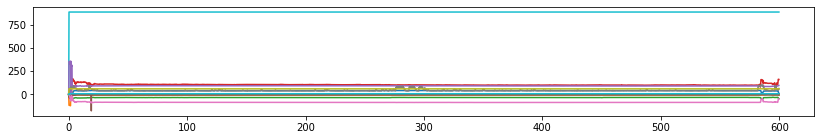

In [102]:
fig = plt.figure(figsize=(14,2))
plt.plot(data);

It is difficult to see exactly what is happening at the beginning and end. Since the accelerometer data may be what we are most interested in, let us only plot that data stream.

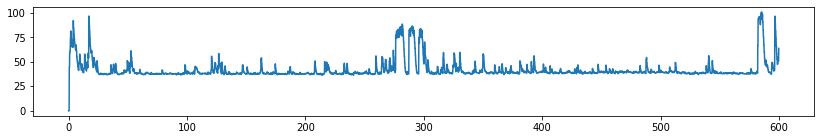

In [107]:
fig, ax = plt.subplots(figsize=(14,2))
plt.plot(data.Gain);

Let us look more closely at the beginning and end to detect when the claps happened.

(570.0, 610.0)

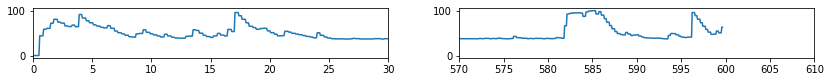

In [115]:
fig, ax = plt.subplots(figsize=(14,2))

ax1 = plt.subplot(2, 2, 1)
plt.plot(data.Gain);
ax1.set_xlim(0, 30)

ax2 = plt.subplot(2, 2, 2)
plt.plot(data.Gain);
ax2.set_xlim(570, 610)

We can see that there is a lot of movement in the beginning and end. This is when I moved the mobile phone before and after the experiment. So I want to remove those parts. 

In [116]:
# Cutting off the part before the clap
data_without_beginning = data.tail(-16*int(sr))

In [117]:
# Cutting off the last 20 seconds of the file
data_clean = data_without_beginning.head(-2*int(sr))

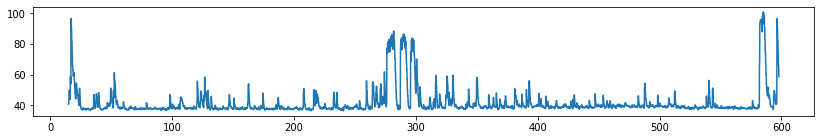

In [118]:
fig = plt.figure(figsize=(14,2))
plt.plot(data_clean.Gain);

In [119]:
time_array = data_clean.index[1:]
duration = time_array[-1]-time_array[1]
duration

582.521472

Now we finally have a dataset that we can investigate further. Before moving on, let us save it as a clean CSV file. 

In [121]:
phone_out_fn = date + '_' + stillstanding_no + '_phone.csv'

In [122]:
data_clean.to_csv(phone_out_fn)